In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pd_explain

usetex-False


In [2]:
songs_df = pd.read_csv(r"..\Examples\Datasets\spotify_all.csv")
songs_df

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,decade,popularity_score,main_artist,duration_minutes
0,0.991000,['Mamie Smith'],0.598,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,...,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920,1920,10,Mamie Smith,2.805550
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,...,I Put A Spell On You,7,0.0534,86.889,0.9500,1920,1920,0,Screamin' Jay Hawkins,2.503333
2,0.993000,['Mamie Smith'],0.647,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,...,Golfing Papa,4,0.1740,97.600,0.6890,1920,1920,0,Mamie Smith,2.730450
3,0.000173,['Oscar Velazquez'],0.730,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,...,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920,1920,10,Oscar Velazquez,7.034783
4,0.295000,['Mixe'],0.704,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,...,Xuniverxe,2,0.0768,122.076,0.2990,1920,1920,0,Mixe,2.753733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,...,The One,0,0.0356,125.972,0.1860,2020,2020,0,DJ Combo,2.460250
174385,0.795000,['Alessia Cara'],0.429,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,...,A Little More,0,0.0360,94.710,0.2280,2021,2020,0,Alessia Cara,2.412000
174386,0.806000,['Roger Fly'],0.671,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,...,Together,0,0.0282,108.058,0.7140,2020,2020,0,Roger Fly,3.635783
174387,0.920000,['Taylor Swift'],0.462,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,...,champagne problems,69,0.0377,171.319,0.3200,2021,2020,60,Taylor Swift,4.066667


In [6]:
drake_decades = songs_df[(songs_df['main_artist'] == 'Drake')][['main_artist', 'decade']].drop_duplicates().reset_index(drop=True)
drake_decades

,main_artist,decade
0,Drake,2000
1,Drake,2010
2,Drake,2020


In [7]:
drake_very_popular = songs_df[(songs_df['main_artist'] == 'Drake') & (songs_df['popularity'] > 80)][['main_artist', 'name', 'popularity', 'decade']].drop_duplicates().reset_index(drop=True)
print(type(drake_very_popular))
# drake_very_popular = drake_very_popular.drop_duplicates()
drake_very_popular

<class 'pd_explain.explainable_data_frame.ExpDataFrame'>


,main_artist,name,popularity,decade
0,Drake,God's Plan,83,2010
1,Drake,Money In The Grave (Drake ft. Rick Ross),81,2010
2,Drake,Laugh Now Cry Later (feat. Lil Durk),89,2020
3,Drake,Chicago Freestyle (feat. Giveon),83,2020
4,Drake,Toosie Slide,83,2020


In [10]:
drake_popular_decades = drake_very_popular.join(drake_decades, on=['main_artist', 'decade'], how='inner')
drake_popular_decades

,index,main_artist,name,popularity,decade
0,0,Drake,God's Plan,83,2010
1,1,Drake,Money In The Grave (Drake ft. Rick Ross),81,2010
2,2,Drake,Laugh Now Cry Later (feat. Lil Durk),89,2020
3,3,Drake,Chicago Freestyle (feat. Giveon),83,2020
4,4,Drake,Toosie Slide,83,2020


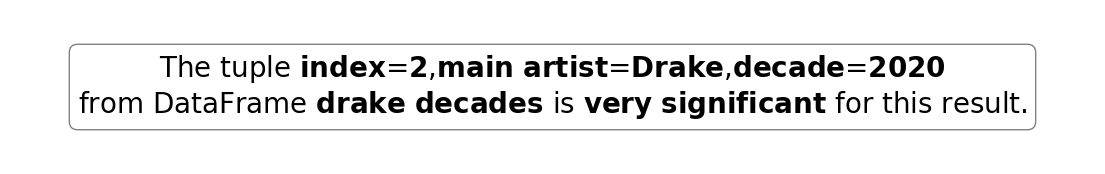

In [11]:
drake_popular_decades.explain(explainer='shapley')